# **IMPORTING REQUIRED LIBRARIES**




In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
import random
import pydotplus

warnings.filterwarnings('ignore') 
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
from pylab import rcParams 
from matplotlib.cm import rainbow
from prettytable import PrettyTable 
# from sklearn.metrics import jaccard_similarity_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix


# **IMPORTING THE DATASET**

In [ ]:
#importing the dataset
df = pd.read_csv('/content/heart(303).csv')
df = pd.DataFrame(df)
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#specifies rows and columns
df.shape

(303, 14)

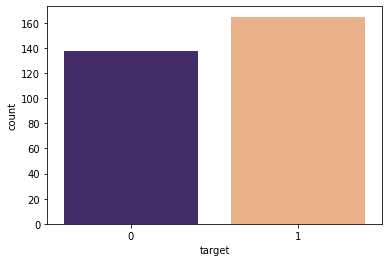

In [ ]:
#to check if the data is balanced
sns.countplot(df['target'],palette=['#432371',"#FAAE7B"])#Show the counts of observations
plt.show()

In [ ]:
print("Null values :: ")
print(df.isnull() .sum())

Null values :: 
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


DUPLICATION CHECK

In [ ]:
#Check duplicate rows in data
# duplicate_rows = df[df.duplicated()]
# print("Number of duplicate rows :: ", duplicate_rows.shape)
# print(duplicate_rows)


In [ ]:
# #Removing the duplicate row
# df = df.drop_duplicates()
# duplicate_rows = df[df.duplicated()]
# print("Number of duplicate rows :: ", duplicate_rows.shape)
# print(duplicate_rows)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **CORRELATION MATRIX**

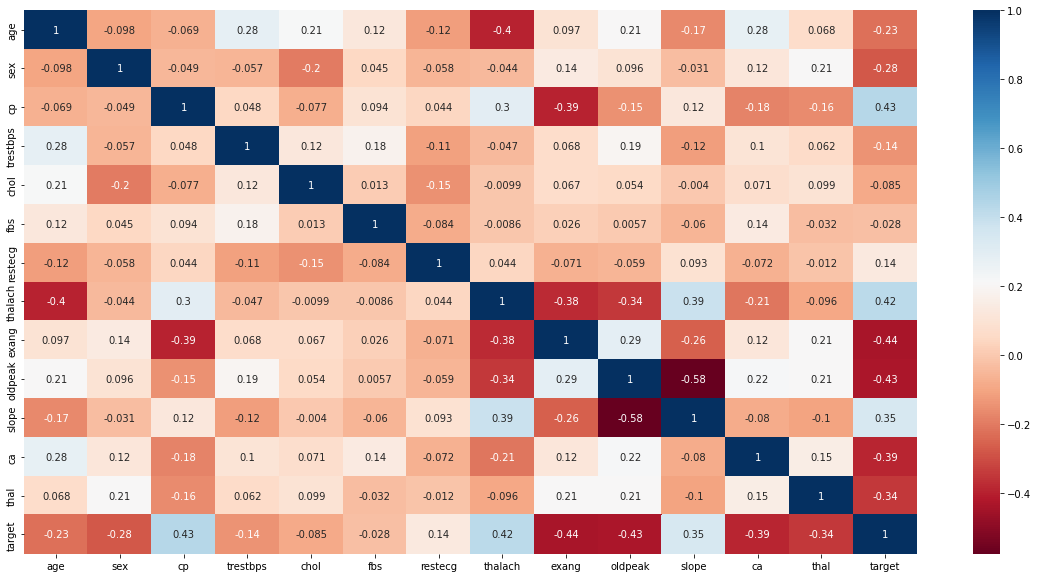

In [ ]:
#Visualization of Correlation of attributes with HeatMap 
plt.figure(figsize = (20,10))
c = df.corr()
sns.heatmap(c, cmap = 'RdBu', annot = True)
plt.show()


# **ONE HOT ENCODING**

In [ ]:
x= df.iloc[:,:-1] 
y= df.iloc[:,-1] 

#df = pd.get_dummies(df, columns = ['cp','restecg','slope','ca','thal'])

# standardScaler = StandardScaler() #removes the mean and scales each feature/variable to unit variance.
# columns_to_scale = ['age','trestbps','chol','thalach','exang','oldpeak']
# df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])#fit_transform() is used for the initial fitting of parameters on the training set x, while also returning the transformed x
# display(df)


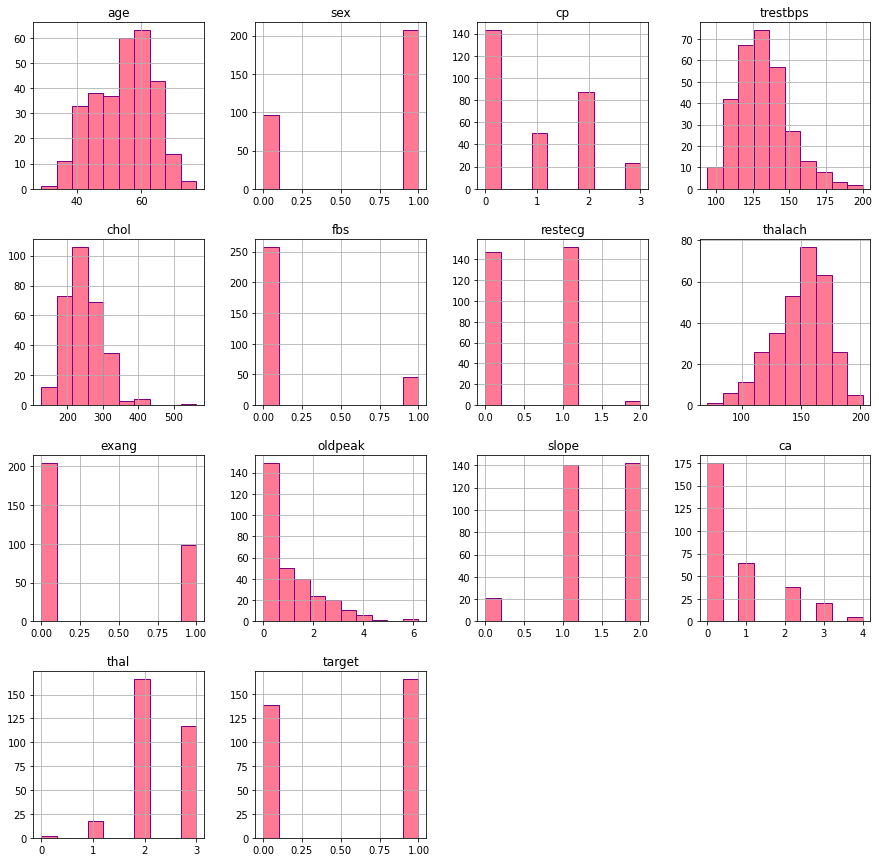

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

# **NORMALIZATION**

In [ ]:
cols_to_norm = ['age','trestbps','chol','thalach','oldpeak','cp','restecg','slope','ca','thal']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
display(df)
# df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - np.mean(x)) / (np.std(x)))
# display(df)  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,1.000000,0.481132,0.244292,1,0.0,0.603053,0,0.370968,0.0,0.00,0.333333,1
1,0.166667,1,0.666667,0.339623,0.283105,0,0.5,0.885496,0,0.564516,0.0,0.00,0.666667,1
2,0.250000,0,0.333333,0.339623,0.178082,0,0.0,0.770992,0,0.225806,1.0,0.00,0.666667,1
3,0.562500,1,0.333333,0.245283,0.251142,0,0.5,0.816794,0,0.129032,1.0,0.00,0.666667,1
4,0.583333,0,0.000000,0.245283,0.520548,0,0.5,0.702290,1,0.096774,1.0,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0.000000,0.433962,0.262557,0,0.5,0.396947,1,0.032258,0.5,0.00,1.000000,0
299,0.333333,1,1.000000,0.150943,0.315068,0,0.5,0.465649,0,0.193548,0.5,0.00,1.000000,0
300,0.812500,1,0.000000,0.471698,0.152968,1,0.5,0.534351,0,0.548387,0.5,0.50,1.000000,0
301,0.583333,1,0.000000,0.339623,0.011416,0,0.5,0.335878,1,0.193548,0.5,0.25,1.000000,0


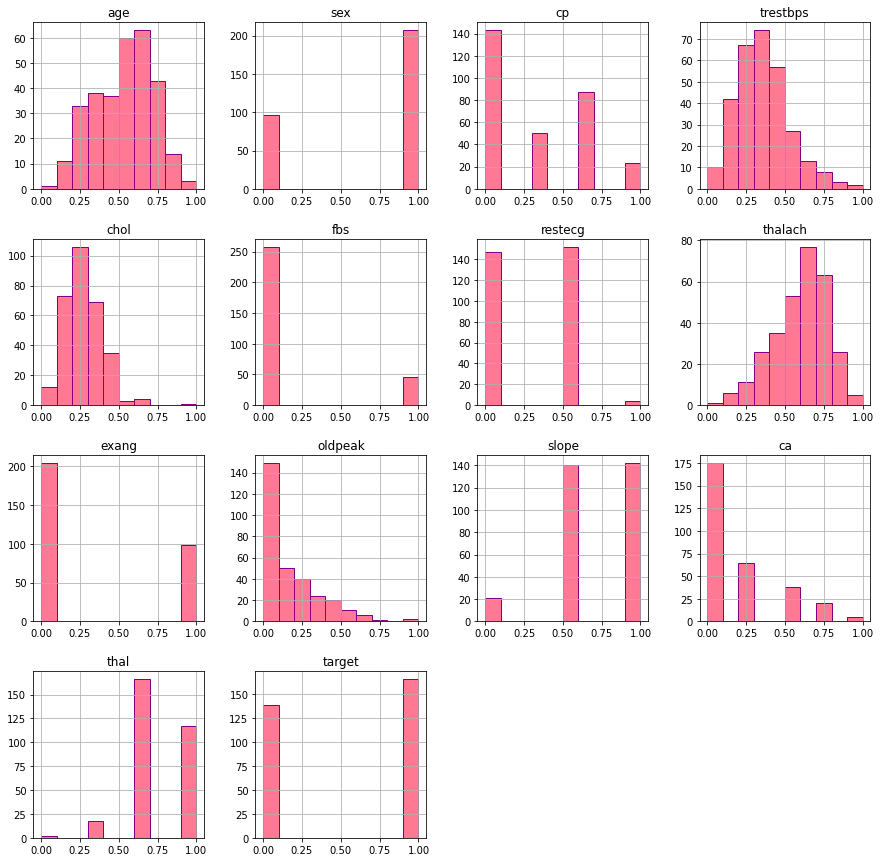

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

In [ ]:
# normalized = preprocessing.normalize(df)#converts into array
# print("Normalized Data =\n",normalized)

# # without converting
# n = preprocessing.normalize(df)
# scalled_n = pd.DataFrame(n)
# scalled_n.head()

MIN MAX

In [ ]:
# scaler = preprocessing.MinMaxScaler()
# d = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(d)
# scaled_df.head()

Z SCORE

In [ ]:
# # copy the data
# z_scaled = df.copy()
  
# # apply normalization techniques
# for column in z_scaled.columns:
#     z_scaled[column] = (z_scaled[column] -z_scaled[column].mean()) / z_scaled[column].std()    
  
# # view normalized data   
# display(z_scaled)

# **SPLITTING THE DATASET INTO TRAINING AND TESTING**

In [ ]:
# random.seed(10) 
# x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=10)
# st_x= StandardScaler()    
# x_train= st_x.fit_transform(x_train)    
# x_test= st_x.transform(x_test) 


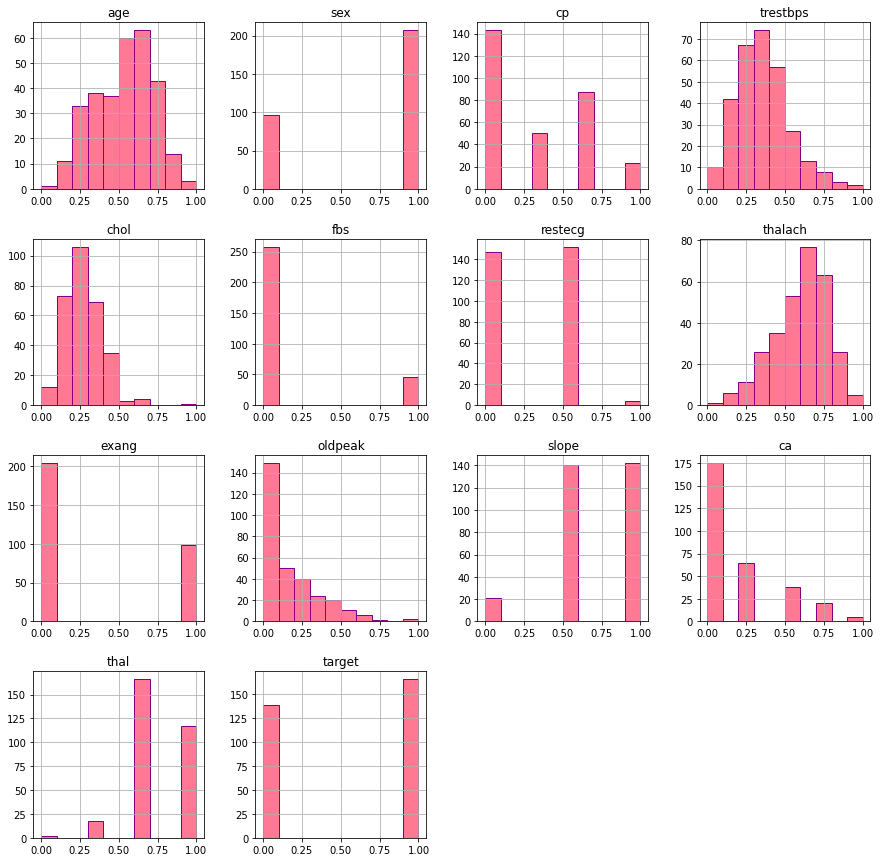

In [ ]:
df.hist(figsize=(15, 15),color='#ff7994',edgecolor='purple')
plt.show()

# **CROSS VALIDATION**

In [ ]:
#Importing required libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
 
 
#Implementing cross validation
 
k = 5
kf = KFold(n_splits=k, random_state=None)
 
for train_index , test_index in kf.split(x):
    x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
    print("%s %s" % (train_index, test_index))

# scoresT = cross_val_score(df, x, y, cv=5)
# print(scoresT)

[ 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132
 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168
 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186
 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302] [ 0  1  2  3  4  

# **K-NEAREST NEIGHBORS**

**CHECKING FOR THE BEST K VALUE**

Minimum error:- 0.38333333333333336 at K = 2


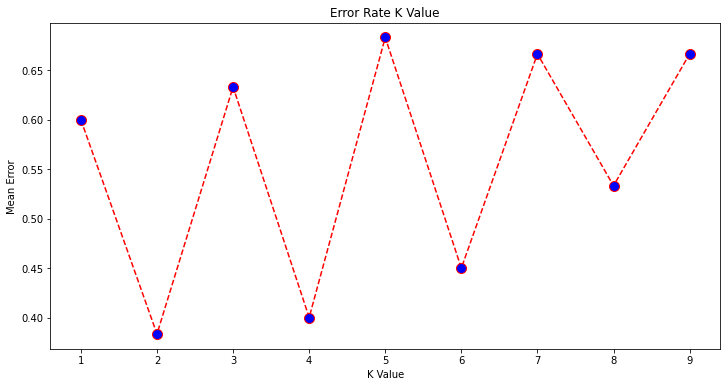

In [ ]:
error = []

# Calculating error for K values between 1 and 30
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    #print(error.append(np.mean(pred_i != y_test)))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)


**TRAINING**

In [ ]:
#print(pd.DataFrame(x_train))


3 METRICS OF KNN

In [ ]:
#3 metrics
KNN_mi= KNeighborsClassifier(n_neighbors=5, metric = 'minkowski') 
KNN_e= KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
KNN_ma= KNeighborsClassifier(n_neighbors=5, metric = 'manhattan',weights='uniform')
KNN_j= KNeighborsClassifier(n_neighbors=5, metric = 'jaccard')
KNN_h= KNeighborsClassifier(n_neighbors=5, metric = 'hamming')
KNN_c= KNeighborsClassifier(n_neighbors=5, metric = 'cosine')

KNN_mi.fit(x_train, y_train)
KNN_e.fit(x_train, y_train)
KNN_ma.fit(x_train, y_train)
KNN_j.fit(x_train, y_train)
KNN_h.fit(x_train, y_train)
KNN_c.fit(x_train, y_train)

y_pred_mi= KNN_mi.predict(x_test)
y_pred_e= KNN_e.predict(x_test)
y_pred_ma= KNN_ma.predict(x_test)
y_pred_j= KNN_j.predict(x_test)
y_pred_h= KNN_h.predict(x_test)
y_pred_c= KNN_c.predict(x_test)

print('\nKNN Minkowski Prediction:\n',y_pred_mi)
print('\nKNN Euclidean Prediction:\n',y_pred_e)
print('\nKNN Manhattan Prediction:\n',y_pred_ma)
print('\nKNN Jaccard Prediction:\n',y_pred_j)
print('\nKNN Hamming Prediction:\n',y_pred_h)
print('\nKNN Cosine Prediction:\n',y_pred_c)



KNN Minkowski Prediction:
 [0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1]

KNN Euclidean Prediction:
 [0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0
 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1]

KNN Manhattan Prediction:
 [0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0
 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1]

KNN Jaccard Prediction:
 [0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0
 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 1]

KNN Hamming Prediction:
 [0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 1 1
 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1]

KNN Cosine Prediction:
 [0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1 0
 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1]


**CONFUSION MATRIX**

Manhattan Metric


 CLASSIFICATION REPORT OF MANHATTAN METRIC:

               precision    recall  f1-score   support

           0       1.00      0.42      0.59        60
           1       0.00      0.00      0.00         0

    accuracy                           0.42        60
   macro avg       0.50      0.21      0.29        60
weighted avg       1.00      0.42      0.59        60


 RECALL SCORE OF MANHATTAN METRIC :  0.0

 PRECISION SCORE OF MANHATTAN METRIC :  0.0

 F1 SCORE OF MANHATTAN METRIC :  0.0




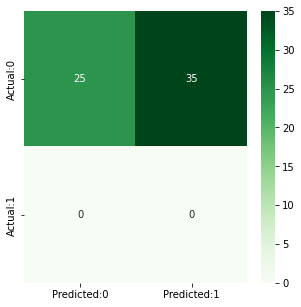

In [ ]:
cm_ma=confusion_matrix(y_test, y_pred_ma)
print('\n CLASSIFICATION REPORT OF MANHATTAN METRIC:\n\n',classification_report(y_test, y_pred_ma))
cm_ma = pd.DataFrame(data = cm_ma, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_ma_r=recall_score(y_test, y_pred_ma)
KNN_ma_p= precision_score(y_test, y_pred_ma)
KNN_ma_f1=f1_score(y_test, y_pred_ma)
print('\n RECALL SCORE OF MANHATTAN METRIC : ',recall_score(y_test, y_pred_ma))
print('\n PRECISION SCORE OF MANHATTAN METRIC : ', precision_score(y_test, y_pred_ma))
print('\n F1 SCORE OF MANHATTAN METRIC : ', f1_score(y_test, y_pred_ma))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_ma, annot = True, fmt ='d', cmap = "Greens")
plt.show()


Minkowski Metric


 CLASSIFICATION REPORT OF MINKOWSKI METRIC:

               precision    recall  f1-score   support

           0       1.00      0.32      0.48        60
           1       0.00      0.00      0.00         0

    accuracy                           0.32        60
   macro avg       0.50      0.16      0.24        60
weighted avg       1.00      0.32      0.48        60


 RECALL SCORE OF MINKOWSKI METRIC :  0.0

 PRECISION SCORE OF MINKOWSKI METRIC :  0.0

 F1 SCORE OF MINKOWSKI METRIC :  0.0




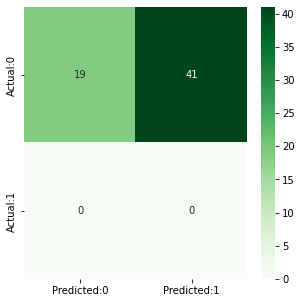

In [ ]:
cm_mi=confusion_matrix(y_test, y_pred_mi)
print('\n CLASSIFICATION REPORT OF MINKOWSKI METRIC:\n\n',classification_report(y_test, y_pred_mi))
cm_mi = pd.DataFrame(data = cm_mi, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_mi_r=recall_score(y_test, y_pred_mi)
KNN_mi_p=precision_score(y_test, y_pred_mi)
KNN_mi_f1=f1_score(y_test, y_pred_mi)
print('\n RECALL SCORE OF MINKOWSKI METRIC : ', recall_score(y_test, y_pred_mi))
print('\n PRECISION SCORE OF MINKOWSKI METRIC : ', precision_score(y_test, y_pred_mi))
print('\n F1 SCORE OF MINKOWSKI METRIC : ', f1_score(y_test, y_pred_mi))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_mi, annot = True, fmt ='d', cmap = "Greens")
plt.show()


Euclidean Metric


 CLASSIFICATION REPORT OF EUCLIDEAN METRIC:

               precision    recall  f1-score   support

           0       1.00      0.32      0.48        60
           1       0.00      0.00      0.00         0

    accuracy                           0.32        60
   macro avg       0.50      0.16      0.24        60
weighted avg       1.00      0.32      0.48        60


 RECALL SCORE OF EUCLIDEAN METRIC :  0.0

 PRECISION SCORE OF EUCLIDEAN METRIC :  0.0

 F1 SCORE OF EUCLIDEAN METRIC :  0.0




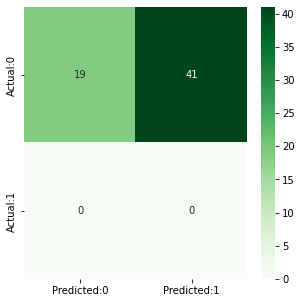

In [ ]:
cm_e=confusion_matrix(y_test, y_pred_e)
print('\n CLASSIFICATION REPORT OF EUCLIDEAN METRIC:\n\n',classification_report(y_test, y_pred_e))
cm_e = pd.DataFrame(data = cm_e, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_e_r=recall_score(y_test, y_pred_e)
KNN_e_p=precision_score(y_test, y_pred_e)
KNN_e_f1=f1_score(y_test, y_pred_e)
print('\n RECALL SCORE OF EUCLIDEAN METRIC : ', recall_score(y_test, y_pred_e))
print('\n PRECISION SCORE OF EUCLIDEAN METRIC : ', precision_score(y_test, y_pred_e))
print('\n F1 SCORE OF EUCLIDEAN METRIC : ', f1_score(y_test, y_pred_e))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_e, annot = True, fmt ='d', cmap = "Greens")
plt.show()


Jaccard Metric


 CLASSIFICATION REPORT OF JACCARD METRIC:

               precision    recall  f1-score   support

           0       1.00      0.63      0.78        60
           1       0.00      0.00      0.00         0

    accuracy                           0.63        60
   macro avg       0.50      0.32      0.39        60
weighted avg       1.00      0.63      0.78        60


 RECALL SCORE OF JACCARD METRIC :  0.0

 PRECISION SCORE OF JACCARD METRIC :  0.0

 F1 SCORE OF JACCARD METRIC :  0.0




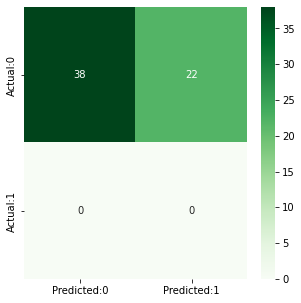

In [ ]:
cm_j=confusion_matrix(y_test, y_pred_j)
print('\n CLASSIFICATION REPORT OF JACCARD METRIC:\n\n',classification_report(y_test, y_pred_j))
cm_j = pd.DataFrame(data = cm_j, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_j_r=recall_score(y_test, y_pred_j)
KNN_j_p=precision_score(y_test, y_pred_j)
KNN_j_f1=f1_score(y_test, y_pred_j)
print('\n RECALL SCORE OF JACCARD METRIC : ', recall_score(y_test, y_pred_j))
print('\n PRECISION SCORE OF JACCARD METRIC : ', precision_score(y_test, y_pred_j))
print('\n F1 SCORE OF JACCARD METRIC : ', f1_score(y_test, y_pred_j))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_j, annot = True, fmt ='d', cmap = "Greens")
plt.show()


Hamming Metric


 CLASSIFICATION REPORT OF HAMMING METRIC:

               precision    recall  f1-score   support

           0       1.00      0.57      0.72        60
           1       0.00      0.00      0.00         0

    accuracy                           0.57        60
   macro avg       0.50      0.28      0.36        60
weighted avg       1.00      0.57      0.72        60


 RECALL SCORE OF HAMMING METRIC :  0.0

 PRECISION SCORE OF HAMMING METRIC :  0.0

 F1 SCORE OF HAMMING METRIC :  0.0




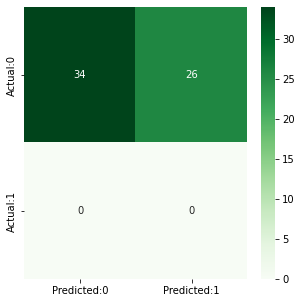

In [ ]:
cm_h=confusion_matrix(y_test, y_pred_h)
print('\n CLASSIFICATION REPORT OF HAMMING METRIC:\n\n',classification_report(y_test, y_pred_h))
cm_h = pd.DataFrame(data = cm_h, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_h_r=recall_score(y_test, y_pred_h)
KNN_h_p=precision_score(y_test, y_pred_h)
KNN_h_f1=f1_score(y_test, y_pred_h)
print('\n RECALL SCORE OF HAMMING METRIC : ', recall_score(y_test, y_pred_h))
print('\n PRECISION SCORE OF HAMMING METRIC : ', precision_score(y_test, y_pred_h))
print('\n F1 SCORE OF HAMMING METRIC : ', f1_score(y_test, y_pred_h))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_h, annot = True, fmt ='d', cmap = "Greens")
plt.show()


Cosine Metric


 CLASSIFICATION REPORT OF COSINE METRIC:

               precision    recall  f1-score   support

           0       1.00      0.42      0.59        60
           1       0.00      0.00      0.00         0

    accuracy                           0.42        60
   macro avg       0.50      0.21      0.29        60
weighted avg       1.00      0.42      0.59        60


 RECALL SCORE OF COSINE METRIC :  0.0

 PRECISION SCORE OF COSINE METRIC :  0.0

 F1 SCORE OF COSINE METRIC :  0.0




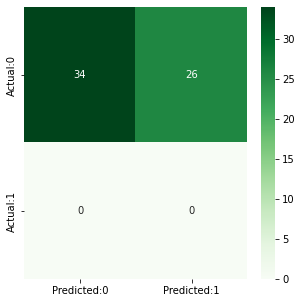

In [ ]:
cm_c=confusion_matrix(y_test, y_pred_c)
print('\n CLASSIFICATION REPORT OF COSINE METRIC:\n\n',classification_report(y_test, y_pred_c))
cm_c = pd.DataFrame(data = cm_h, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
KNN_c_r=recall_score(y_test, y_pred_c)
KNN_c_p=precision_score(y_test, y_pred_c)
KNN_c_f1=f1_score(y_test, y_pred_c)
print('\n RECALL SCORE OF COSINE METRIC : ', recall_score(y_test, y_pred_c))
print('\n PRECISION SCORE OF COSINE METRIC : ', precision_score(y_test, y_pred_c))
print('\n F1 SCORE OF COSINE METRIC : ', f1_score(y_test, y_pred_c))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_c, annot = True, fmt ='d', cmap = "Greens")
plt.show()


**TESTING**

In [ ]:
# # Predicting a new result - target 0
# print("MANHATTAN:",KNN_ma.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print("MINKOWSKI:",KNN_mi.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print("EUCLIDEAN:",KNN_e.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print("COSINE :",KNN_c.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print("HAMMING:",KNN_h.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print("JACCARD:",KNN_j.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))

In [ ]:
# # Predicting a new result - target 1
# print("MANHATTAN:",KNN_ma.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print("MINKOWSKI:",KNN_mi.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print("EUCLIDEAN:",KNN_e.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print("HAMMING:",KNN_h.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print("COSINE :",KNN_c.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print("JACCARD:",KNN_j.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))

**ACCURACY**

In [ ]:
KNN_ma_acc=accuracy_score(y_test, y_pred_ma)
KNN_mi_acc=accuracy_score(y_test, y_pred_mi)
KNN_e_acc=accuracy_score(y_test, y_pred_e)
KNN_j_acc=accuracy_score(y_test, y_pred_j)
KNN_h_acc=accuracy_score(y_test, y_pred_h)
KNN_c_acc=accuracy_score(y_test, y_pred_c)


NameError: ignored

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["METRICS", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(["Manhattan",KNN_ma_acc,KNN_ma_p,KNN_ma_r,KNN_ma_f1]) 
myTable.add_row(["Minkowski",KNN_mi_acc,KNN_mi_p,KNN_mi_r,KNN_mi_f1]) 
myTable.add_row(["Euclidean",KNN_e_acc,KNN_e_p,KNN_e_r,KNN_e_f1]) 
myTable.add_row(["Jaccard",KNN_j_acc,KNN_j_p,KNN_j_r,KNN_j_f1]) 
myTable.add_row(["Hamming",KNN_h_acc,KNN_h_p,KNN_h_r,KNN_h_f1]) 
myTable.add_row(["Cosine",KNN_c_acc,KNN_c_p,KNN_c_r,KNN_c_f1]) 
  
print(myTable)


# **SUPPORT VECTOR MACHINE**


**TRAINING**

Linear kernel

In [ ]:
SVM = SVC(kernel='linear')
SVM.fit(x_train,y_train)
SVM_l_pred = SVM.predict(x_test)
SVM_l_Score = accuracy_score(y_test,SVM_l_pred)
SVM_l_precision_score = precision_score(y_test,SVM_l_pred)
SVM_l_recall_score = recall_score(y_test,SVM_l_pred)
SVM_l_f1_Score = f1_score(y_test,SVM_l_pred)
print('Prediction:',SVM_l_pred)


Gaussian radial basis function Kernel

In [ ]:
SVM = SVC(kernel='rbf')
SVM.fit(x_train,y_train)
SVM_g_pred = SVM.predict(x_test)
SVM_g_Score = accuracy_score(y_test,SVM_g_pred)
SVM_g_precision_score = precision_score(y_test,SVM_g_pred)
SVM_g_recall_score = recall_score(y_test,SVM_g_pred)
SVM_g_f1_Score = f1_score(y_test,SVM_g_pred)
print('Prediction:',SVM_g_pred)


Polynomial Kernel

In [ ]:
SVM = SVC(kernel='poly', degree=1)
SVM.fit(x_train,y_train)
SVM_p_pred = SVM.predict(x_test)
SVM_p_Score = accuracy_score(y_test,SVM_p_pred)
SVM_p_precision_score = precision_score(y_test,SVM_p_pred)
SVM_p_recall_score = recall_score(y_test,SVM_p_pred)
SVM_p_f1_Score = f1_score(y_test,SVM_p_pred)
print('Prediction:',SVM_p_pred)


Sigmoid Kernel

In [ ]:
SVM = SVC(kernel='sigmoid')
SVM.fit(x_train,y_train)
SVM_s_pred = SVM.predict(x_test)
SVM_s_Score = accuracy_score(y_test,SVM_s_pred)
SVM_s_precision_score = precision_score(y_test,SVM_s_pred)
SVM_s_recall_score = recall_score(y_test,SVM_s_pred)
SVM_s_f1_Score = f1_score(y_test,SVM_s_pred)
print('Prediction:',SVM_s_pred)


**CONFUSION MATRIX**

Linear kernel

In [ ]:
cm_l= confusion_matrix(y_test, SVM_l_pred)
print('\n CLASSIFICATION REPORT\n\n', classification_report(y_test, SVM_l_pred))
cm_l= pd.DataFrame(data = cm_l, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
SVM_l_r=recall_score(y_test, SVM_l_pred)
SVM_l_p=precision_score(y_test, SVM_l_pred)
SVM_l_f1=f1_score(y_test, SVM_l_pred)
print('\n RECALL SCORE  : ', recall_score(y_test, SVM_l_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, SVM_l_pred))
print('\n F1 SCORE  : ', f1_score(y_test, SVM_l_pred))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_l, annot = True, cmap = "Greens")
plt.show()
#print('Confusion matrix (before tuning):\n', cm)


Gaussian radial basis function Kernel

In [ ]:
cm_g= confusion_matrix(y_test, SVM_g_pred)
print('\n CLASSIFICATION REPORT\n\n', classification_report(y_test, SVM_g_pred))
cm_g= pd.DataFrame(data = cm_g, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
SVM_g_r=recall_score(y_test, SVM_g_pred)
SVM_g_p=precision_score(y_test, SVM_g_pred)
SVM_g_f1=f1_score(y_test, SVM_g_pred)
print('\n RECALL SCORE  : ', recall_score(y_test, SVM_g_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, SVM_g_pred))
print('\n F1 SCORE  : ', f1_score(y_test, SVM_g_pred))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_g, annot = True, cmap = "Greens")
plt.show()
#print('Confusion matrix (before tuning):\n', cm)


Polynomial Kernel

In [ ]:
cm_p= confusion_matrix(y_test, SVM_p_pred)
print('\n CLASSIFICATION REPORT\n\n', classification_report(y_test, SVM_p_pred))
cm_p= pd.DataFrame(data = cm_p, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
SVM_p_r=recall_score(y_test, SVM_p_pred)
SVM_p_p=precision_score(y_test, SVM_p_pred)
SVM_p_f1=f1_score(y_test, SVM_p_pred)
print('\n RECALL SCORE  : ', recall_score(y_test, SVM_p_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, SVM_p_pred))
print('\n F1 SCORE  : ', f1_score(y_test, SVM_p_pred))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_p, annot = True, cmap = "Greens")
plt.show()
#print('Confusion matrix (before tuning):\n', cm)


Sigmoid Kernel

In [ ]:
cm_s= confusion_matrix(y_test, SVM_s_pred)
print('\n CLASSIFICATION REPORT\n\n', classification_report(y_test, SVM_s_pred))
cm_s= pd.DataFrame(data = cm_s, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
SVM_s_r=recall_score(y_test, SVM_s_pred)
SVM_s_p=precision_score(y_test, SVM_s_pred)
SVM_s_f1=f1_score(y_test, SVM_s_pred)
print('\n RECALL SCORE  : ', recall_score(y_test, SVM_s_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, SVM_s_pred))
print('\n F1 SCORE  : ', f1_score(y_test, SVM_s_pred))
print('\n')
plt.figure(figsize = (5, 5))
sns.heatmap(cm_s, annot = True, cmap = "Greens")
plt.show()


**TESTING**

In [ ]:
# # Predicting a new result - target 0
# print(SVM.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))


In [ ]:
# # Predicting a new result - target 1
# print(SVM.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))


In [ ]:
# import joblib
# model = joblib.load('model.pkl')
# model.predict(previously_loaded_data)
# clf = load('filename.joblib') 

**ACCURACY**

In [ ]:
# print("Linear:",SVM_l_Score)
# print("RBF:",SVM_g_Score)
# print("POLYNOMIAL:",SVM_p_Score)
# print("SIGMOID:",SVM_s_Score)


In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["KERNELS", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(["Linear",SVM_l_Score,SVM_l_p,SVM_l_r,SVM_l_f1]) 
myTable.add_row(["RBF",SVM_g_Score,SVM_g_p,SVM_g_r,SVM_g_f1]) 
myTable.add_row(["Polynomial",SVM_p_Score,SVM_p_p,SVM_p_r,SVM_p_f1]) 
myTable.add_row(["Sigmoid",SVM_s_Score,SVM_s_p,SVM_s_r,SVM_s_f1])  
print(myTable)


# **DECISION TREE ALGORITHM**

In [ ]:
# To find the accuracy result for DTA
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)
DT_Pred = DT.predict(x_test)
DT_accuracy = accuracy_score(y_test, DT_Pred)
DT_precision = precision_score(y_test, DT_Pred)
DT_recall_score = recall_score(y_test,DT_Pred)
DT_f1_score = f1_score(y_test,DT_Pred)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, DT_Pred))
print('\n PRECISION SCORE : ', precision_score(y_test, DT_Pred))
print('\n RECALL SCORE : ', DT_recall_score)
print('\n F1 SCORE : ', DT_f1_score)



In [ ]:
#Tree Prediction
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,filled=True, rounded=True,special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [ ]:
# To find the accuracy result for DTA using ENTROPY algorithm used for calculating information gain...
from sklearn.tree import DecisionTreeClassifier

E_DT = DecisionTreeClassifier(criterion='entropy',splitter ='best',max_depth=None,random_state=0)
E_DT = E_DT.fit(x_train, y_train)
E_DT_Pred = E_DT.predict(x_test)
E_DT_accuracy = accuracy_score(y_test, E_DT_Pred)
E_DT_precision = precision_score(y_test, E_DT_Pred)
E_DT_recall_score = recall_score(y_test,E_DT_Pred)
E_DT_f1_score = f1_score(y_test,E_DT_Pred)
print('\n CLASSIFICATION REPORT :', classification_report(y_test, E_DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,E_DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, E_DT_Pred))
print('\n PRECISION SCORE : ', precision_score(y_test, E_DT_Pred))
print('\n RECALL SCORE : ',recall_score(y_test,E_DT_Pred))
print('\n F1 SCORE :',f1_score(y_test,E_DT_Pred))

In [ ]:
# To find the accuracy result for DTA using GINI algorithm used for calculating Gini index...
from sklearn.tree import DecisionTreeClassifier

GI_DT = DecisionTreeClassifier(criterion='gini',splitter ='best',max_depth=None,random_state=0)
GI_DT.fit(x_train, y_train)
GI_DT_Pred = GI_DT.predict(x_test)
GI_DT_accuracy = accuracy_score(y_test, GI_DT_Pred)
GI_DT_precision = precision_score(y_test, GI_DT_Pred)
GI_DT_recall_score = recall_score(y_test,GI_DT_Pred)
GI_DT_f1_score = f1_score(y_test,GI_DT_Pred)
print('\n CLASSIFICATION REPORT :', classification_report(y_test,GI_DT_Pred))
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,GI_DT_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', accuracy_score(y_test,GI_DT_Pred))
print('\n PRECISION SCORE : ', precision_score(y_test,GI_DT_Pred))
print('\n RECALL SCORE : ',recall_score(y_test,GI_DT_Pred))
print('\n F1 SCORE :',f1_score(y_test,GI_DT_Pred))

RESULT:

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Information Gain',E_DT_accuracy,E_DT_precision ,E_DT_recall_score ,E_DT_f1_score]) 
myTable.add_row(['Gini Index',GI_DT_accuracy, GI_DT_precision ,GI_DT_recall_score ,GI_DT_f1_score])  
print(myTable)

PREDECTION:

In [ ]:
print("The prediction value for Entropy Method : ")
print(E_DT_Pred)

In [ ]:
print("The prediction value for Gini Index Method : ")
print(GI_DT_Pred)

TESTING:

In [ ]:
# # Predicting a new result - target 0
# print(DT.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print(E_DT.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print(GI_DT.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))

In [ ]:
# # Predicting a new result - target 1
# print(DT.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print(E_DT.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print(E_DT.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))

# **RANDOM FOREST ALGORITHM**


In [ ]:
# To find the accuracy for RFA
from sklearn.ensemble import RandomForestClassifier
    
RDF = RandomForestClassifier()
RDF.fit(x_train,y_train)
RDF_pred = RDF.predict(x_test)
RDF_accuracy = accuracy_score(y_test, RDF_pred)
RDF_precision = precision_score(y_test, RDF_pred)
RDF_recall_score = recall_score(y_test,RDF_pred)
RDF_Score = f1_score(y_test,RDF_pred)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, RDF_pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, RDF_pred))
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, RDF_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, RDF_pred))
print('\n RECALL SCORE : ',recall_score(y_test,RDF_pred))
print('\n F1 SCORE :',f1_score(y_test,RDF_pred))
cm= confusion_matrix(y_test, RDF_pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()


In [ ]:
#Tree Prediction
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

# Extract single tree
estimator = model.estimators_[50]

from sklearn.tree import export_graphviz
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,filled=True, rounded=True,special_characters=True,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [ ]:
#Splited based on the sub-tree graph
from matplotlib.cm import rainbow

rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(x_train, y_train)
    rf_scores.append(rf_classifier.score(x_test, y_test))
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
     plt.text(i,round(rf_scores[i],3),round(rf_scores[i],3))
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')


In [ ]:
# To find the accuracy result for DTA using ENTROPY algorithm used for calculating Information gain...
from sklearn.ensemble import RandomForestClassifier
    
RDF_E = RandomForestClassifier(criterion='entropy',random_state=0)
RDF_E.fit(x_train,y_train)
RDF_pred_E = RDF_E.predict(x_test)
RDF_accuracy_E = accuracy_score(y_test, RDF_pred_E)
RDF_precision_E = precision_score(y_test, RDF_pred_E)
RDF_recall_score_E = recall_score(y_test,RDF_pred_E)
RDF_Score_E = f1_score(y_test,RDF_pred_E)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, RDF_pred_E))
print('\n CONFUSION MATRIX : \n')
cm= confusion_matrix(y_test, RDF_pred_E)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, RDF_pred_E))
print('\n PRECISION SCORE : ', precision_score(y_test, RDF_pred_E))
print('\n PRECISION SCORE : ', precision_score(y_test, RDF_pred_E))
print('\n RECALL SCORE : ',recall_score(y_test,RDF_pred_E))
print('\n F1 SCORE :',f1_score(y_test,RDF_pred_E))

In [ ]:
# To find the accuracy result for DTA using CART algorithm used for calculating Gini index...
from sklearn.ensemble import RandomForestClassifier
    
RDF_GI = RandomForestClassifier(criterion='gini', random_state=0)
RDF_GI.fit(x_train,y_train)
RDF_pred_GI= RDF.predict(x_test)
RDF_accuracy_GI = accuracy_score(y_test, RDF_pred_GI)
RDF_precision_GI = precision_score(y_test, RDF_pred_GI)
RDF_recall_score_GI = recall_score(y_test,RDF_pred_GI)
RDF_Score_GI = f1_score(y_test,RDF_pred_GI)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, RDF_pred_GI))
print('\n CONFUSION MATRIX : \n')
cm= confusion_matrix(y_test, RDF_pred_GI)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, RDF_pred_GI))
print('\n PRECISION SCORE : ', precision_score(y_test, RDF_pred_GI))
print('\n PRECISION SCORE : ', precision_score(y_test, RDF_pred_GI))
print('\n RECALL SCORE : ',recall_score(y_test,RDF_pred_GI))
print('\n F1 SCORE :',f1_score(y_test,RDF_pred_GI))

RESULT

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Information Gain',RDF_accuracy_E,RDF_precision_E ,RDF_recall_score_E ,RDF_Score_E]) 
myTable.add_row(['Gini Index',RDF_accuracy_GI,RDF_precision_GI ,RDF_recall_score_GI ,RDF_Score_GI])   
print(myTable)

PREDICTION

In [ ]:
print("The prediction value for Entropy Method : ")
print(RDF_pred_E)

In [ ]:
print("The prediction value for Entropy Method : ")
print(RDF_pred_GI)

TESTING

In [ ]:
# # Predicting a new result - target 0
# print(RDF.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print(RDF_E.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))
# print(RDF_GI.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))

In [ ]:
# # Predicting a new result - target 1
# print(RDF.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print(RDF_E.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))
# print(RDF_GI.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))

# **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

bayes_accuracy = accuracy_score(y_test, y_pred)
bayes_precision = precision_score(y_test, y_pred)
bayes_recall_score = recall_score(y_test,y_pred)
bayes_Score = f1_score(y_test,y_pred)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, y_pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred))
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, y_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, y_pred))
print('\n RECALL SCORE : ',recall_score(y_test,y_pred))
print('\n F1 SCORE :',f1_score(y_test,y_pred))
cm= confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()


In [ ]:
myTable = PrettyTable(["METRICS", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(["Naive Bayes",bayes_accuracy,bayes_precision,bayes_recall_score,bayes_Score])
print(myTable)

In [ ]:
print("The prediction value for NB Method : ")
print(y_pred)

In [ ]:
# # Predicting a new result - target 0
# print(classifier.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))

In [ ]:
# # Predicting a new result - target 1
# print(classifier.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))

# **LOGISTIC REGRESSION**


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_Pred= logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test, logreg_Pred)
logreg_precision = precision_score(y_test, logreg_Pred)
logreg_recall_score = recall_score(y_test,logreg_Pred)
logreg_f1_score = f1_score(y_test,logreg_Pred)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, logreg_Pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, logreg_Pred))
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, logreg_Pred))
print('\n PRECISION SCORE : ', precision_score(y_test, logreg_Pred))
print('\n RECALL SCORE : ', logreg_recall_score)
print('\n F1 SCORE : ', logreg_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,logreg_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_M= LogisticRegression(multi_class='multinomial', solver='lbfgs')
logreg_M.fit(x_train, y_train)
logreg_Pred_M= logreg_M.predict(x_test)
logreg_accuracy_M= accuracy_score(y_test, logreg_Pred_M)
logreg_precision_M= precision_score(y_test, logreg_Pred_M)
logreg_recall_score_M = recall_score(y_test,logreg_Pred_M)
logreg_f1_score_M = f1_score(y_test,logreg_Pred_M)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, logreg_Pred_M))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, logreg_Pred_M))
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, logreg_Pred_M))
print('\n PRECISION SCORE : ', precision_score(y_test, logreg_Pred_M))
print('\n RECALL SCORE : ', logreg_recall_score_M)
print('\n F1 SCORE : ', logreg_f1_score_M)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,logreg_Pred_M)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["CRITERIA","Accuracy","Precision", "Recall", "F1"]) 
  
# Add rows 
myTable.add_row(['Logistic Regression',logreg_accuracy, logreg_precision, logreg_recall_score, logreg_f1_score]) 
myTable.add_row(['MultinomialRegression ',logreg_accuracy_M,logreg_precision_M,logreg_recall_score_M,logreg_recall_score_M])   
print(myTable)

In [ ]:
# # Predicting a new result - target 0
# print(logreg.predict(st_x.transform([[68,	1,	0,	144,	193,	1,	1,	141,	0,	3.4,	1,	2,	3	]])))

In [ ]:
# # Predicting a new result - target 1
# print(logreg.predict(st_x.transform([[63,	1,	3,	145,	233,	1,	0,	150,	0,	2.3,	0,	0,	1	]])))

# **XGBOOST**

In [ ]:
from xgboost import XGBClassifier

XG = XGBClassifier()

XG.fit(x_train,y_train)

XG_Pred = XG.predict(x_test)
XG_accuracy = accuracy_score(y_test, XG_Pred)
XG_precision = precision_score(y_test, XG_Pred)
XG_recall_score = recall_score(y_test,XG_Pred)
XG_f1_score = f1_score(y_test,XG_Pred)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, XG_Pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, XG_Pred))
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, XG_Pred))
print('\n PRECISION SCORE : ', precision_score(y_test, XG_Pred))
print('\n RECALL SCORE : ', XG_recall_score)
print('\n F1 SCORE : ', XG_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,XG_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['XGBoosting',XG_accuracy,XG_precision ,XG_recall_score ,XG_f1_score]) 

print(myTable)

# **GRADIENT BOOST**

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
GB_Pred = GB.predict(x_test)
GB_accuracy = accuracy_score(y_test, GB_Pred)
GB_precision = precision_score(y_test, GB_Pred)
GB_recall_score = recall_score(y_test,GB_Pred)
GB_f1_score = f1_score(y_test,GB_Pred)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, GB_Pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, GB_Pred))
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, GB_Pred))
print('\n PRECISION SCORE : ', precision_score(y_test, GB_Pred))
print('\n RECALL SCORE : ', GB_recall_score)
print('\n F1 SCORE : ', GB_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,GB_Pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()

In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['Gradient Boosting',GB_accuracy,GB_precision ,GB_recall_score ,GB_f1_score]) 

print(myTable)

# **ADABOOST**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
model1 = abc.fit(x_train, y_train)
y_pred = model1.predict(x_test)

ada_accuracy = accuracy_score(y_test, y_pred)
ada_precision = precision_score(y_test, y_pred)
ada_recall_score = recall_score(y_test,y_pred)
ada_f1_score = f1_score(y_test,y_pred)
print('\n CLASSIFICATION REPORT\n', classification_report(y_test, y_pred))
print('\n CONFUSION MATRIX\n', confusion_matrix(y_test, y_pred))
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, y_pred))
print('\n PRECISION SCORE : ', precision_score(y_test, y_pred))
print('\n RECALL SCORE : ', ada_recall_score)
print('\n F1 SCORE : ', ada_f1_score)
print('\n CONFUSION MATRIX\n')
cm= confusion_matrix(y_test,y_pred)
cm = pd.DataFrame(data = cm, columns = ['Predicted:0', 'Predicted:1'], index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 5))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Greens")
plt.show()



In [ ]:
print(classification_report(y_test,y_pred))


In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['AdaBoosting',ada_accuracy,ada_precision ,ada_recall_score ,ada_f1_score]) 

print(myTable)

# **MODEL ACCURACY**

In [ ]:
myTable = PrettyTable(["    KNN_NB-METRICS    ", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"])  
# Add rows 
myTable.add_row(["Manhattan",KNN_ma_acc,KNN_ma_p,KNN_ma_r,KNN_ma_f1]) 
myTable.add_row(["Minkowski",KNN_mi_acc,KNN_mi_p,KNN_mi_r,KNN_mi_f1]) 
myTable.add_row(["Euclidean",KNN_e_acc,KNN_e_p,KNN_e_r,KNN_e_f1]) 
myTable.add_row(["Jaccard",KNN_j_acc,KNN_j_p,KNN_j_r,KNN_j_f1]) 
myTable.add_row(["Hamming",KNN_h_acc,KNN_h_p,KNN_h_r,KNN_h_f1]) 
myTable.add_row(["Cosine",KNN_c_acc,KNN_c_p,KNN_c_r,KNN_c_f1]) 
# Add rows 
myTable.add_row(["Naive Bayes",bayes_accuracy,bayes_precision,bayes_recall_score,bayes_Score])
print(myTable)
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["     SVM-KERNELS      ", "ACCURACY","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
# Add rows 
myTable.add_row(["Linear",SVM_l_Score,SVM_l_p,SVM_l_r,SVM_l_f1]) 
myTable.add_row(["RBF",SVM_g_Score,SVM_g_p,SVM_g_r,SVM_g_f1]) 
myTable.add_row(["Polynomial",SVM_p_Score,SVM_p_p,SVM_p_r,SVM_p_f1]) 
myTable.add_row(["Sigmoid",SVM_s_Score,SVM_s_p,SVM_s_r,SVM_s_f1])  
print(myTable)
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["DT_RF_LR-CRITERIA","Accuracy","Precision", "Recall", "F1"])   
# Add rows 
myTable.add_row(['DT-Information Gain',E_DT_accuracy,E_DT_precision ,E_DT_recall_score ,E_DT_f1_score]) 
myTable.add_row(['DT-Gini Index',GI_DT_accuracy, GI_DT_precision ,GI_DT_recall_score ,GI_DT_f1_score])  
# Add rows 
myTable.add_row(['RF-Information Gain',RDF_accuracy_E,RDF_precision_E ,RDF_recall_score_E ,RDF_Score_E]) 
myTable.add_row(['RF-Gini Index',RDF_accuracy_GI,RDF_precision_GI ,RDF_recall_score_GI ,RDF_Score_GI])   
# Add rows 
myTable.add_row(['Logistic Regression',logreg_accuracy, logreg_precision, logreg_recall_score, logreg_f1_score]) 
myTable.add_row(['MultinomialRegression ',logreg_accuracy_M,logreg_precision_M,logreg_recall_score_M,logreg_recall_score_M])   
print(myTable)


In [ ]:
model_accuracy = pd.Series(data=[KNN_ma_acc,KNN_mi_acc,KNN_e_acc,KNN_j_acc,KNN_h_acc,KNN_c_acc,SVM_l_Score,SVM_g_Score,SVM_p_Score,SVM_s_Score,E_DT_accuracy,GI_DT_accuracy,RDF_accuracy_E,RDF_accuracy_GI,logreg_accuracy,logreg_accuracy_M,bayes_accuracy], 
                index=['KNN-Manhattan Metric','KNN-Minkowski Metric','KNN-Euclidean Metric','KNN-Jaccard Metric','KNN-Hamming Metric','KNN-Cosine Metric','SVM-Linear Kernal','SVM-RBF Kernel','SVM-Polynomial Kernel','SVM-Sigmoid Kernel','DT-Information Gain','DT-Gini Index','RDF-Information Gain','RDF-Gini Index','LR-Binomial','LR-Multinomial','Naive Bayes'])
fig= plt.figure(figsize=(10,10))
model_accuracy.sort_values().plot.barh(color={ "#00C3af"})
plt.title('Model Accuracy')

# **BOOSTING MODEL ACCURACY**

In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["METRICS", "ACCURACY SCORE","PRECISION SCORE","RECALL SCORE","F1 SCORE"]) 
  
# Add rows 
myTable.add_row(['AdaBoosting',ada_accuracy,ada_precision ,ada_recall_score ,ada_f1_score]) 
myTable.add_row(['XGBoosting',XG_accuracy,XG_precision ,XG_recall_score ,XG_f1_score]) 
myTable.add_row(['GBBoosting',GB_accuracy,GB_precision ,GB_recall_score ,GB_f1_score]) 
print(myTable)

In [ ]:
model_accuracy = pd.Series(data=[ada_accuracy,GB_accuracy,XG_accuracy], 
                index=['AdaBoost','GradientBoost','XGBoost'])
fig= plt.figure(figsize=(10,10))
model_accuracy.sort_values().plot.barh(color={ "#00C3af"})
plt.title('Model Accuracy')

# **IMPORTING DATASET CONSISTING ACCURACIES**

In [ ]:
# print("MINKOWSKI:",KNN_mi.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))
# print("SVM      :",SVM.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))
# print("DT       :",E_DT.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))
# print("RDF      :",RDF_E.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2		]])))
# print("NB       :",classifier.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))
# print("LR       :",logreg.predict(st_x.transform([[62,	0,	0,	140,	268,	0,	0,	160,	0,	3.6	,0,	2,	2	]])))

In [ ]:
# #Importing required libraries
# from sklearn.datasets import load_breast_cancer
# import pandas as pd
# from sklearn.model_selection import KFold 
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score
 
# #Loading the dataset
# df = pd.read_csv('/content/heart(303).csv')
# x = df.iloc[:,:-1]
# y = df.iloc[:,-1]
 
# #Implementing cross validation
 
# k = 5
# kf = KFold(n_splits=k, random_state=None)
# model = LogisticRegression(solver= 'liblinear')
 
# acc_score = []
 
# for train_index , test_index in kf.split(x):
#     x_train , x_test = x.iloc[train_index,:],x.iloc[test_index,:]
#     y_train , y_test = y[train_index] , y[test_index]
     
#     model.fit(x_train,y_train)
#     pred_values = model.predict(x_test)
     
#     acc = accuracy_score(pred_values , y_test)
#     acc_score.append(acc)
     
# avg_acc_score = sum(acc_score)/k
 
# print('accuracy of each fold - {}'.format(acc_score))
# print('Avg accuracy : {}'.format(avg_acc_score))

In [ ]:
#3 metrics
KNN_mi= KNeighborsClassifier(n_neighbors=5, metric = 'minkowski') 
KNN_e= KNeighborsClassifier(n_neighbors=5, metric = 'euclidean')
KNN_ma= KNeighborsClassifier(n_neighbors=5, metric = 'manhattan',weights='uniform')
KNN_j= KNeighborsClassifier(n_neighbors=5, metric = 'jaccard')
KNN_h= KNeighborsClassifier(n_neighbors=5, metric = 'hamming')
KNN_c= KNeighborsClassifier(n_neighbors=5, metric = 'cosine')
E_DT = DecisionTreeClassifier(criterion='entropy',splitter ='best',max_depth=None,random_state=0)
GI_DT = DecisionTreeClassifier(criterion='gini',splitter ='best',max_depth=None,random_state=0)

KNN_mi.fit(x_train, y_train)
KNN_e.fit(x_train, y_train)
KNN_ma.fit(x_train, y_train)
KNN_j.fit(x_train, y_train)
KNN_h.fit(x_train, y_train)
KNN_c.fit(x_train, y_train)
E_DT = E_DT.fit(x_train, y_train)
GI_DT = GI_DT.fit(x_train, y_train)

y_pred_mi= KNN_mi.predict(x_test)
y_pred_e= KNN_e.predict(x_test)
y_pred_ma= KNN_ma.predict(x_test)
y_pred_j= KNN_j.predict(x_test)
y_pred_h= KNN_h.predict(x_test)
y_pred_c= KNN_c.predict(x_test)
E_DT_Pred = E_DT.predict(x_test)
GI_DT_Pred = GI_DT.predict(x_test)


KNN_ma_acc=accuracy_score(y_test, y_pred_ma)
KNN_mi_acc=accuracy_score(y_test, y_pred_mi)
KNN_e_acc=accuracy_score(y_test, y_pred_e)
KNN_j_acc=accuracy_score(y_test, y_pred_j)
KNN_h_acc=accuracy_score(y_test, y_pred_h)
KNN_c_acc=accuracy_score(y_test, y_pred_c)
E_DT_accuracy = accuracy_score(y_test, E_DT_Pred)
GI_DT_accuracy = accuracy_score(y_test, E_DT_Pred)


In [ ]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(["METRICS", "ACCURACY"]) 
  
# Add rows 
myTable.add_row(["Manhattan",KNN_ma_acc]) 
myTable.add_row(["Minkowski",KNN_mi_acc]) 
myTable.add_row(["Euclidean",KNN_e_acc]) 
myTable.add_row(["Jaccard",KNN_j_acc]) 
myTable.add_row(["Hamming",KNN_h_acc]) 
myTable.add_row(["Cosine",KNN_c_acc])
myTable.add_row(["Entropy",E_DT_accuracy])
myTable.add_row(["Gini Index",GI_DT_accuracy]) 

  
print(myTable)

# **CORRELATION MATRIX**

In [ ]:
#importing the dataset
data = pd.read_csv('/content/Prediction - both testing and traning.csv')
display(data)
all(data)

In [ ]:
cor={'KNN':0,'SVM':1,'DT':2,'RF':3,'NB':4,'LR':5} #index value 

In [ ]:
rows, cols = (7, 7)
val = [[0 for i in range(cols)] for j in range(rows)] #creating the double array
for i in range(1,7):
  for j in range(1,7):
    tt=0
    tf=0
    ft=0
    ff=0
    for count in range(62):
      if data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        tt=tt+1
      elif data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        tf=tf+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        ft=ft+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        ff=ff+1
    try:
      correlation = int (2*ff)/int (tf+ft+(2*ff))
    except ZeroDivisionError:
	    correlation = 0
    val[i][j] = correlation
    # print('\n')

In [ ]:
for i in range(1,7):
  print(f"         {data.columns[i]}",end="")
print("\n")

for i in range(1,7):
  print(data.columns[i],end ="       ")
  for j in range(1,7):
    print(round(val[i][j],2),end = "       ")
  print('\n')



# NB - LR = 0.89
# 0.78 0.77

# KNN - NB and KNN - LR = 0.74
# SVM - NB and SVM - LR = 0.73

# SVM - KNN = 0.7
# 0.80  0.85

# RF - NB and RF - LR = 0.5
# KNN - RF =  0.46
# DT - RF = 0.4
# SVM - RF = 0.38
# KNN - DT = 0.35
# DT - SVM = 0.3

#KNN-LR=0.91
#SVM-KNN=0.75
#SVM-LR=0.67
#KNN-NB=0.6
#NB-LR=0.55

In [ ]:
data = pd.read_csv('/content/Prediction - both testing and traning.csv',usecols=['TARGET','KNN','DT','RF','NB'])

rows, cols = (7, 7)
val = [[0 for i in range(cols)] for j in range(rows)] #creating the double array
for i in range(1,5):
  for j in range(1,5):
    tt=0
    tf=0
    ft=0
    ff=0
    for count in range(62):
      if data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        tt=tt+1
      elif data.iloc[count,i] == data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        tf=tf+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] == data['TARGET'][count]:
        ft=ft+1
      elif data.iloc[count,i] != data['TARGET'][count] and data.iloc[count,j] != data['TARGET'][count]:
        ff=ff+1
    try:
      correlation = int (2*ff)/int (tf+ft+(2*ff))
    except ZeroDivisionError:
	    correlation = 0
    val[i][j] = correlation

In [ ]:
for i in range(1,5):
  print(f"        {data.columns[i]}",end="")
print("\n")

for i in range(1,5):
  print(data.columns[i],end ="      ")
  for j in range(1,5):
    print(round(val[i][j],2),end = "      ")
  print('\n')

In [ ]:
from numpy import mean
from numpy import std
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(dpi=80, facecolor='w', edgecolor='k')
 
  
# get a stacking of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('rf', RandomForestClassifier()))
  level0.append(('lr',LogisticRegression()))

  # define meta learner model
  level1 = KNeighborsClassifier()

  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model

# get a list of models to evaluate
def get_models():
  models = dict()
  models['Decision tree'] = DecisionTreeClassifier()
  models['Random Forest'] = RandomForestClassifier()
  models['Logistic Regression'] = LogisticRegression()
  models['Stacking'] = get_stacking()
  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  scores1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
  scores2 = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
  scores3 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
  return scores,scores1,scores2,scores3
 
# define dataset
df = pd.read_csv('/content/heart(303).csv',usecols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
df1 = pd.read_csv('/content/heart(303).csv',usecols=['target'])
X,y = df,df1.target

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results,results1,results2,results3,names= list(),list(),list(),list(),list()
for name, model in models.items():
  scores= evaluate_model(model)
  scores1=evaluate_model(model)
  scores2=evaluate_model(model)
  scores3=evaluate_model(model)
  results.append(scores)
  results1.append(scores1)
  results2.append(scores2)
  results3.append(scores3)
  names.append(name)
  print('>%s -> %.3f (%.3f)' % (name+"- Accuracy Score  ", mean(scores), std(scores)))
  print('>%s -> %.3f (%.3f)' % (name+"- Precision Score ", mean(scores1), std(scores1)))
  print('>%s -> %.3f (%.3f)' % (name+"- Recall Score    ", mean(scores2), std(scores2)))
  print('>%s -> %.3f (%.3f)' % (name+"- F1 Score        ", mean(scores3), std(scores3)))
  print('\n')

In [ ]:
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('cart', DecisionTreeClassifier()))
  level0.append(('lr',LogisticRegression()))
  level0.append(('knn',KNeighborsClassifier()))

  # define meta learner model
  level1 = RandomForestClassifier()

  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['Decision tree'] = DecisionTreeClassifier()
  models['LogisticRegression'] = LogisticRegression()
  models['KNN'] = KNeighborsClassifier()
  models['Stacking'] = get_stacking()
  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  scores1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
  scores2 = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
  scores3 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
  return scores,scores1,scores2,scores3
 
# define dataset
df = pd.read_csv('/content/heart(303).csv',usecols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
df1 = pd.read_csv('/content/heart(303).csv',usecols=['target'])
X,y = df,df1.target

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results,results1,results2,results3,names= list(),list(),list(),list(),list()
for name, model in models.items():
  scores= evaluate_model(model)
  scores1=evaluate_model(model)
  scores2=evaluate_model(model)
  scores3=evaluate_model(model)
  results.append(scores)
  results1.append(scores1)
  results2.append(scores2)
  results3.append(scores3)
  names.append(name)
  print('>%s -> %.3f (%.3f)' % (name+"- Accuracy Score  ", mean(scores), std(scores)))
  print('>%s -> %.3f (%.3f)' % (name+"- Precision Score ", mean(scores1), std(scores1)))
  print('>%s -> %.3f (%.3f)' % (name+"- Recall Score    ", mean(scores2), std(scores2)))
  print('>%s -> %.3f (%.3f)' % (name+"- F1 Score        ", mean(scores3), std(scores3)))
  print('\n')
  

In [ ]:
# get a stacking ensemble of models
def get_stacking():
  # define the base models
  level0 = list()
  level0.append(('rf', RandomForestClassifier()))
  level0.append(('knn',KNeighborsClassifier()))

  # define meta learner model
  level1 = LogisticRegression()

  # define the stacking ensemble
  model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
  return model
 
# get a list of models to evaluate
def get_models():
  models = dict()
  models['Random Forest'] = RandomForestClassifier()
  models['KNN'] = KNeighborsClassifier()
  models['Stacking'] = get_stacking()
  return models
 
# evaluate a give model using cross-validation
def evaluate_model(model):
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
  scores1 = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1, error_score='raise')
  scores2 = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1, error_score='raise')
  scores3 = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1, error_score='raise')
  return scores,scores1,scores2,scores3
 
# define dataset
df = pd.read_csv('/content/heart(303).csv',usecols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal'])
df1 = pd.read_csv('/content/heart(303).csv',usecols=['target'])
X,y = df,df1.target

# get the models to evaluate
models = get_models()

# evaluate the models and store results
results,results1,results2,results3,names= list(),list(),list(),list(),list()
for name, model in models.items():
  scores= evaluate_model(model)
  scores1=evaluate_model(model)
  scores2=evaluate_model(model)
  scores3=evaluate_model(model)
  results.append(scores)
  results1.append(scores1)
  results2.append(scores2)
  results3.append(scores3)
  names.append(name)
  print('>%s -> %.3f (%.3f)' % (name+"- Accuracy Score  ", mean(scores), std(scores)))
  print('>%s -> %.3f (%.3f)' % (name+"- Precision Score ", mean(scores1), std(scores1)))
  print('>%s -> %.3f (%.3f)' % (name+"- Recall Score    ", mean(scores2), std(scores2)))
  print('>%s -> %.3f (%.3f)' % (name+"- F1 Score        ", mean(scores3), std(scores3)))
  print('\n')
  

# **LEVEL - 3**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Create Learners per layer
layer_one_estimators = [
                        ('rf_1', RandomForestClassifier(n_estimators=10, random_state=42)),
                        ('knn_1', KNeighborsClassifier(n_neighbors=5))             
                       ]
layer_two_estimators = [
                        ('dt_2', DecisionTreeClassifier()),
                        ('rf_2', RandomForestClassifier(n_estimators=50, random_state=42)),
                       ]
layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator= LogisticRegression())

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two)

print('\n ------------ Prediction of Stacking for training dataset ------------')
clf.fit(x_train, y_train)
Stacking = clf.predict(x_train)
Stacking_accuracy = accuracy_score(y_train, Stacking)
Stacking_precision = precision_score(y_train, Stacking)
Stacking_recall_score = recall_score(y_train,Stacking)
Stacking_f1_score = f1_score(y_train,Stacking)
print('\n ACCURACY SCORE  : ', accuracy_score(y_train, Stacking))
print('\n PRECISION SCORE : ', precision_score(y_train, Stacking))
print('\n RECALL SCORE : ', Stacking_recall_score)
print('\n F1 SCORE : ', Stacking_f1_score)

print('\n ------------ Prediction of Stacking for testing dataset ------------')
clf.fit(x_test, y_test)
Stacking = clf.predict(x_test)
Stacking_accuracy = accuracy_score(y_test, Stacking)
Stacking_precision = precision_score(y_test, Stacking)
Stacking_recall_score = recall_score(y_test,Stacking)
Stacking_f1_score = f1_score(y_test,Stacking)
print('\n ACCURACY SCORE  : ', accuracy_score(y_test, Stacking))
print('\n PRECISION SCORE : ', precision_score(y_test, Stacking))
print('\n RECALL SCORE : ', Stacking_recall_score)
print('\n F1 SCORE : ', Stacking_f1_score)

# **DEEP NEURAL NETWORK**

In [ ]:
import random
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=13, activation='relu'))
model.add(Dense(13, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#model1 = Sequential()
#model1.add(Dense(500, input_dim=11, activation='relu'))
#model1.add(Dense(500, input_dim=200, activation='relu'))
#model1.add(Dense(320, input_dim=200, activation='relu'))
#model1.add(Dense(1, activation='tanh'))


In [ ]:
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [ ]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy',tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])
#,tf.keras.metrics.Recall()


In [ ]:
# fit the keras model on the dataset
kera=model.fit(x_train, y_train, epochs=80, batch_size=13,validation_data=(x_val, y_val))
#kera=model.fit(x, y, epochs=150, batch_size=13)

In [ ]:
# evaluate the keras model
_, DNNaccuracy,recall,precision = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (DNNaccuracy*100))
print('recall: %.2f' % (recall*100))
print('precision: %.2f' % (precision*100))
F1 = 2 * (precision * recall) / (precision + recall)
print('F1 score: %.2f' % (F1))


In [ ]:
myTable = PrettyTable(["METRICS", "ACCURACY","PRECISION SCORE","RECALL SCORE"]) 
  
# Add rows 
myTable.add_row(["DNN",DNNaccuracy,precision,recall])
print(myTable)

In [ ]:
kera.history
kera.history['accuracy']
np.mean(kera.history['accuracy'])

In [ ]:
model.summary()

In [ ]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

In [ ]:
plt.plot(kera.history["loss"])
plt.plot(kera.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [ ]:
plt.plot(kera.history['accuracy'])
plt.plot(kera.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("The prediction value for DNN Method : ")
print(kera)